In [1]:
# a script to look at post-sorting steps of spike interface

#import the necessary packages
from pathlib import Path
import platform
import os
import shutil
import argparse
import numpy as np
import matplotlib.pyplot as plt
import spikeinterface.sorters
import spikeinterface.full as si
import  scipy.signal
import spikeinterface.extractors as se
import spikeinterface.comparison
import spikeinterface.exporters
import spikeinterface.curation
import spikeinterface.widgets 
import docker
from datetime import datetime





In [23]:
#set up the base folder
base_folder = '/mnt/rds01/ibn-vision/DATA/SUBJECTS/'
mouse = 'M23034'
date = '20230804'
# ephys folder
ephys_folder = base_folder + mouse + '/ephys/' + date +'/'
print(ephys_folder)
#probe0_raw = si.read_spikeglx(ephys_folder,stream_name='imec0.ap')
#probe1_raw = si.read_spikeglx(ephys_folder,stream_name='imec1.ap')
#probe0_sample_frames = [probe0_raw.get_num_frames(segment_index=i) for i in range(probe0_raw.get_num_segments())]
#probe0_start_sample_frames = [1] + [probe0_sample_frames[i] + 1 for i in range(0, len(probe0_sample_frames)-1)]
#probe1_sample_frames = [probe1_raw.get_num_frames(segment_index=i) for i in range(probe1_raw.get_num_segments())]
#probe1_start_sample_frames = [1] + [probe1_sample_frames[i] + 1 for i in range(0, len(probe1_sample_frames)-1)]

#import pandas as pd
#probe0_segment_frames = pd.DataFrame({'segment start frame': probe0_start_sample_frames, 'segment end frame': probe0_sample_frames})
#probe0_segment_frames.to_csv(ephys_folder+'/probe0/sorters/segment_frames.csv', index=False)
#probe1_segment_frames = pd.DataFrame({'segment start frame': probe1_start_sample_frames, 'segment end frame': probe1_sample_frames})
#probe1_segment_frames.to_csv(ephys_folder+'/probe1/sorters/segment_frames.csv', index=False)

/mnt/rds01/ibn-vision/DATA/SUBJECTS/M23034/ephys/20230804/


In [3]:
#load binary recording file
probe0_preprocessed_corrected = si.load_extractor(dst_folder + 'probe0_preprocessed')
probe1_preprocessed_corrected = si.load_extractor(dst_folder + 'probe1_preprocessed')



In [4]:
#compare sorters

#first load the sorting
probe0_sorting_ks2_5 = si.read_sorter_folder(dst_folder+'/probe0/sorters/kilosort2_5/', register_recording=True, sorting_info=True, raise_error=True)
probe0_sorting_ks4 = si.read_sorter_folder(dst_folder+'/probe0/sorters/kilosort4/', register_recording=True, sorting_info=True, raise_error=True)
probe1_sorting_ks2_5 = si.read_sorter_folder(dst_folder+'/probe1/sorters/kilosort2_5/', register_recording=True, sorting_info=True, raise_error=True)
probe1_sorting_ks3 = si.read_sorter_folder(dst_folder+'/probe1/sorters/kilosort3/', register_recording=True, sorting_info=True, raise_error=True)
print(probe0_sorting_ks2_5)
print(probe0_sorting_ks3)
print(probe1_sorting_ks2_5)
print(probe1_sorting_ks3)

KiloSortSortingExtractor: 561 units - 1 segments - 30.0kHz
KiloSortSortingExtractor: 253 units - 1 segments - 30.0kHz
KiloSortSortingExtractor: 682 units - 1 segments - 30.0kHz
KiloSortSortingExtractor: 505 units - 1 segments - 30.0kHz


In [5]:

# set up parallel processing jobs
job_kwargs = dict(n_jobs=20, chunk_duration='1s', progress_bar=True)
#remove duplicates
probe0_sorting_ks2_5 = si.remove_duplicated_spikes(sorting = probe0_sorting_ks2_5, censored_period_ms=0.3,method='keep_first')
probe0_sorting_ks3 = si.remove_duplicated_spikes(sorting = probe0_sorting_ks3, censored_period_ms=0.3,method='keep_first')
probe1_sorting_ks2_5 = si.remove_duplicated_spikes(sorting = probe1_sorting_ks2_5, censored_period_ms=0.3,method='keep_first')
probe1_sorting_ks3 = si.remove_duplicated_spikes(sorting = probe1_sorting_ks3, censored_period_ms=0.3,method='keep_first')

print(probe0_sorting_ks2_5)
print(probe0_sorting_ks3)
print(probe1_sorting_ks2_5)
print(probe1_sorting_ks3)

RemoveDuplicatedSpikesSorting: 561 units - 1 segments - 30.0kHz
RemoveDuplicatedSpikesSorting: 253 units - 1 segments - 30.0kHz
RemoveDuplicatedSpikesSorting: 682 units - 1 segments - 30.0kHz
RemoveDuplicatedSpikesSorting: 505 units - 1 segments - 30.0kHz


        0        1      2      3      4      5       6       7    8     9    \
0    9631.0   1925.0  131.0  976.0  538.0  273.0  5749.0  7348.0  3.0  19.0   
1     150.0    334.0    0.0   12.0    7.0   14.0    67.0    32.0  2.0   7.0   
2      83.0    412.0    0.0   19.0    3.0   28.0    32.0    35.0  4.0   1.0   
3      11.0   8127.0    0.0    2.0  369.0  565.0    14.0    14.0  0.0   0.0   
4      21.0  13889.0    0.0    2.0  360.0  565.0    24.0    15.0  0.0   1.0   
..      ...      ...    ...    ...    ...    ...     ...     ...  ...   ...   
558     2.0      8.0    0.0    0.0    1.0    1.0     0.0     2.0  0.0   0.0   
559    31.0     30.0    0.0    4.0    8.0    7.0    36.0    21.0  1.0   2.0   
560    37.0     51.0    0.0    5.0   16.0   16.0    56.0    12.0  0.0   1.0   
561    61.0     40.0    0.0    4.0   16.0    9.0    55.0    35.0  0.0   0.0   
562    27.0     16.0    1.0    0.0   24.0    4.0    85.0    13.0  0.0   1.0   

     ...     250     251     252  253     254     2

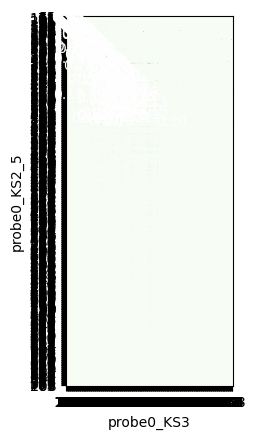

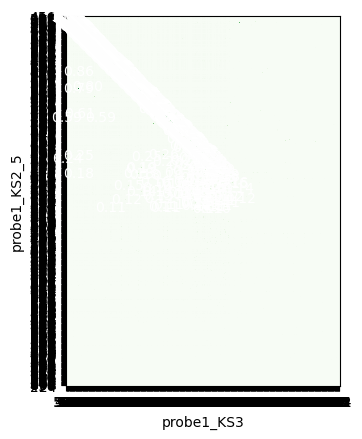

In [6]:

#now compare the sortings
probe0_compare_ks2_5_ks3 = spikeinterface.comparison.compare_two_sorters(sorting1=probe0_sorting_ks2_5, sorting2=probe0_sorting_ks3, sorting1_name='probe0_KS2_5',sorting2_name= 'probe0_KS3')
probe1_compare_ks2_5_ks3 = spikeinterface.comparison.compare_two_sorters(sorting1=probe1_sorting_ks2_5, sorting2=probe1_sorting_ks3,sorting1_name= 'probe1_KS2_5', sorting2_name='probe1_KS3')


#now plot the comparison
si.plot_agreement_matrix(probe0_compare_ks2_5_ks3)
plt.savefig(ephys_folder+'/probe0/sorters/compare_ks2_5_ks3.png')
si.plot_agreement_matrix(probe1_compare_ks2_5_ks3)
plt.savefig(ephys_folder+'/probe1/sorters/compare_ks2_5_ks3.png')


#print the agreement scores and match_event_counts
print(probe0_compare_ks2_5_ks3.match_event_count)
print(probe0_compare_ks2_5_ks3.agreement_scores)
print(probe1_compare_ks2_5_ks3.match_event_count)
print(probe1_compare_ks2_5_ks3.agreement_scores)

In [7]:
#extract waveforms from duplicate removed sortings
#extract waveforms from sorted data
probe0_we_ks2_5 = si.extract_waveforms(probe0_preprocessed_corrected, probe0_sorting_ks2_5, folder= ephys_folder +'/probe0/waveform/kilosort2_5',
                          sparse=True, max_spikes_per_unit=500, ms_before=1.5,ms_after=2.,
                          **job_kwargs)


extract waveforms shared_memory multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

extract waveforms memmap multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

In [8]:


probe0_we_ks3 = si.extract_waveforms(probe0_preprocessed_corrected, probe0_sorting_ks3, folder=ephys_folder +'/probe0/waveform/kilosort3',
                          sparse=True, max_spikes_per_unit=500, ms_before=1.5,ms_after=2., 
                          **job_kwargs)



extract waveforms shared_memory multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

extract waveforms memmap multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

extract waveforms memmap multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [20]:

probe1_we_ks2_5 = si.extract_waveforms(probe1_preprocessed_corrected, probe1_sorting_ks2_5, folder=ephys_folder +'/probe1/waveform/kilosort2_5',
                          sparse=True, max_spikes_per_unit=500, ms_before=1.5,ms_after=2.,
                          **job_kwargs)


probe1_we_ks3 = si.extract_waveforms(probe1_preprocessed_corrected, probe1_sorting_ks3, folder=ephys_folder +'/probe1/waveform/kilosort3',
                          sparse=True, max_spikes_per_unit=500, ms_before=1.5,ms_after=2.,
                          **job_kwargs)


extract waveforms shared_memory multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

extract waveforms memmap multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

extract waveforms memmap multi buffer:   0%|          | 0/4331 [00:00<?, ?it/s]

In [24]:
#grab extracted waveforms saved on the server

probe0_we_ks2_5 = si.load_waveforms(folder = dst_folder + 'probe0/waveform/kilosort2_5/')
probe0_we_ks3 = si.load_waveforms(folder = dst_folder + 'probe0/waveform/kilosort3/')
probe1_we_ks2_5 = si.load_waveforms(folder = ephys_folder + 'probe1/waveform/kilosort2_5/')
probe1_we_ks3 = si.load_waveforms(folder = ephys_folder + 'probe1/waveform/kilosort3/')

template_metric_probe0_ks2_5 = si.compute_template_metrics(probe0_we_ks2_5)
template_metric_probe0_ks3 = si.compute_template_metrics(probe0_we_ks3)
template_metric_probe1_ks2_5 = si.compute_template_metrics(probe1_we_ks2_5)
template_metric_probe1_ks3 = si.compute_template_metrics(probe1_we_ks3)

noise_levels_probe0_ks2_5 = si.compute_noise_levels(probe0_we_ks2_5)
noise_levels_probe0_ks3 = si.compute_noise_levels(probe0_we_ks3)
noise_levels_probe1_ks2_5 = si.compute_noise_levels(probe1_we_ks2_5)
noise_levels_probe1_ks3 = si.compute_noise_levels(probe1_we_ks3)

PCA_probe0_ks2_5 = si.compute_principal_components(probe0_we_ks2_5,**job_kwargs)
PCA_probe0_ks3 = si.compute_principal_components(probe0_we_ks3,**job_kwargs)
PCA_probe1_ks2_5 = si.compute_principal_components(probe1_we_ks2_5,**job_kwargs)
PCA_probe1_ks3 = si.compute_principal_components(probe1_we_ks3,**job_kwargs)

template_similarity_probe0_ks2_5 = si.compute_template_similarity(probe0_we_ks2_5)
template_similarity_probe0_ks3 = si.compute_template_similarity(probe0_we_ks3)
template_similarity_probe1_ks2_5 = si.compute_template_similarity(probe1_we_ks2_5)
template_similarity_probe1_ks3 = si.compute_template_similarity(probe1_we_ks3)

correlograms_probe0_ks2_5 = si.compute_correlograms(probe0_we_ks2_5)
correlograms_probe0_ks3 = si.compute_correlograms(probe0_we_ks3)
correlograms_probe1_ks2_5 = si.compute_correlograms(probe1_we_ks2_5)
correlograms_probe1_ks3 = si.compute_correlograms(probe1_we_ks3)

amplitudes_probe0_ks2_5 = si.compute_spike_amplitudes(probe0_we_ks2_5,**job_kwargs)
amplitudes_probe0_ks3 = si.compute_spike_amplitudes(probe0_we_ks3,**job_kwargs)
amplitudes_probe1_ks2_5 = si.compute_spike_amplitudes(probe1_we_ks2_5,**job_kwargs)
amplitudes_probe1_ks3 = si.compute_spike_amplitudes(probe1_we_ks3,**job_kwargs)


/home/lab/anaconda3/envs/si_env/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/lab/anaconda3/envs/si_env/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/lab/anaconda3/envs/si_env/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/lab/anaconda3/envs/si_env/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/lab/anaconda3/envs/si_env/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r +

Fitting PCA:   0%|          | 0/561 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/561 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/253 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/253 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/682 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/682 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/505 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/505 [00:00<?, ?it/s]

extract amplitudes:   0%|          | 0/4331 [00:00<?, ?it/s]

extract amplitudes:   0%|          | 0/4331 [00:00<?, ?it/s]

extract amplitudes:   0%|          | 0/4331 [00:00<?, ?it/s]

extract amplitudes:   0%|          | 0/4331 [00:00<?, ?it/s]

TypeError: compute_monopolar_triangulation() got an unexpected keyword argument 'n_jobs'

In [25]:

unit_locations_probe0_ks2_5 = si.compute_unit_locations(probe0_we_ks2_5)
unit_locations_probe0_ks3 = si.compute_unit_locations(probe0_we_ks3)
unit_locations_probe1_ks2_5 = si.compute_unit_locations(probe1_we_ks2_5)
unit_locations_probe1_ks3 = si.compute_unit_locations(probe1_we_ks3)

spike_locations_probe0_ks2_5 = si.compute_spike_locations(probe0_we_ks2_5)
spike_locations_probe0_ks3 = si.compute_spike_locations(probe0_we_ks3)
spike_locations_probe1_ks2_5 = si.compute_spike_locations(probe1_we_ks2_5)
spike_locations_probe1_ks3 = si.compute_spike_locations(probe1_we_ks3)


localize peaks using center_of_mass:   0%|          | 0/4331 [00:00<?, ?it/s]

localize peaks using center_of_mass:   0%|          | 0/4331 [00:00<?, ?it/s]

localize peaks using center_of_mass:   0%|          | 0/4331 [00:00<?, ?it/s]

localize peaks using center_of_mass:   0%|          | 0/4331 [00:00<?, ?it/s]

In [26]:

isi_histograms_probe0_ks2_5 = si.compute_isi_histograms(probe0_we_ks2_5)
isi_histograms_probe0_ks3 = si.compute_isi_histograms(probe0_we_ks3)
isi_histograms_probe1_ks2_5 = si.compute_isi_histograms(probe1_we_ks2_5)
isi_histograms_probe1_ks3 = si.compute_isi_histograms(probe1_we_ks3)

In [27]:
qm_list = si.get_quality_metric_list()
print(qm_list)
probe0_ks2_5_metrics = si.compute_quality_metrics(probe0_we_ks2_5, metric_names=qm_list,**job_kwargs)
probe0_ks3_metrics = si.compute_quality_metrics(probe0_we_ks3, metric_names=qm_list,**job_kwargs)
probe1_ks2_5_metrics = si.compute_quality_metrics(probe1_we_ks2_5, metric_names=qm_list,**job_kwargs)
probe1_ks3_metrics = si.compute_quality_metrics(probe1_we_ks3, metric_names=qm_list,**job_kwargs)

['num_spikes', 'firing_rate', 'presence_ratio', 'snr', 'isi_violation', 'rp_violation', 'sliding_rp_violation', 'amplitude_cutoff', 'amplitude_median', 'amplitude_cv', 'synchrony', 'firing_range', 'drift']


/home/lab/anaconda3/envs/si_env/lib/python3.10/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:842: UserWarning: Units [6, 56, 79, 103, 128, 141, 163, 184, 208, 233, 235, 239, 243, 247, 249, 260, 265, 269, 273, 276, 277, 278, 281, 282, 284, 288, 291, 293, 297, 298, 309, 315, 317, 323, 327, 337, 340, 349, 353, 354, 357, 358, 359, 372, 378, 386, 402, 405, 410, 413, 420, 421, 422, 423, 426, 428, 439, 440, 446, 448, 451, 460, 463, 464, 468, 469, 470, 472, 474, 476, 487, 491, 495, 496, 501, 502, 507, 512, 524, 527, 533, 538, 541, 542, 543, 546, 550, 552, 553, 556, 558] have too few spikes and amplitude_cutoff is set to NaN
  warnings.warn(f"Units {nan_units} have too few spikes and " "amplitude_cutoff is set to NaN")
/home/lab/anaconda3/envs/si_env/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lab/anaconda3/envs/si_env/lib/python3.10/site-packages/numpy/

In [39]:
#export to phy
#si.export_to_phy(waveform_extractor=probe0_we_ks2_5, output_folder=ephys_folder + 'probe0/phy/ks2_5',copy_binary = False, **job_kwargs)
#si.export_to_phy(waveform_extractor=probe0_we_ks3, output_folder=ephys_folder + 'probe0/phy/ks3',copy_binary = False,**job_kwargs)
si.export_to_phy(waveform_extractor=probe1_we_ks2_5, output_folder=ephys_folder + 'probe1/phy/ks2_5',copy_binary = False,**job_kwargs)
si.export_to_phy(waveform_extractor=probe1_we_ks3, output_folder=ephys_folder + 'probe1/phy/ks3',copy_binary = False,**job_kwargs)


extract PCs:   0%|          | 0/4331 [00:00<?, ?it/s]

Run:
phy template-gui  /mnt/rds01/ibn-vision/DATA/SUBJECTS/M23034/ephys/20230804/probe1/phy/ks2_5/params.py


extract PCs:   0%|          | 0/4331 [00:00<?, ?it/s]

Run:
phy template-gui  /mnt/rds01/ibn-vision/DATA/SUBJECTS/M23034/ephys/20230804/probe1/phy/ks3/params.py


In [38]:
print(PCA_probe0_ks3)
print(probe0_we_ks3.get_available_extension_names())

WaveformPrincipalComponent: 297 channels - 1 segments
  mode: by_channel_local n_components: 5
['template_metrics', 'similarity', 'principal_components', 'spike_amplitudes', 'correlograms', 'isi_histograms', 'spike_locations', 'unit_locations', 'noise_levels', 'quality_metrics']


In [19]:
import numpy as np

data = np.load(r"Z:\ibn-vision\DATA\SUBJECTS\M23034\ephys\20230805\probe0\waveform\kilosort3\waveforms\sampled_index_0.npy")
print(data.shape)
print(data)

(500,)
[(   93, 0) (  140, 0) (  149, 0) (  166, 0) (  190, 0) (  226, 0)
 (  294, 0) (  300, 0) (  323, 0) (  330, 0) (  339, 0) (  508, 0)
 (  510, 0) (  511, 0) (  575, 0) (  578, 0) (  602, 0) (  709, 0)
 (  918, 0) (  976, 0) ( 1030, 0) ( 1033, 0) ( 1075, 0) ( 1091, 0)
 ( 1095, 0) ( 1134, 0) ( 1154, 0) ( 1185, 0) ( 1249, 0) ( 1298, 0)
 ( 1325, 0) ( 1395, 0) ( 1404, 0) ( 1411, 0) ( 1442, 0) ( 1456, 0)
 ( 1527, 0) ( 1532, 0) ( 1570, 0) ( 1696, 0) ( 1724, 0) ( 1813, 0)
 ( 1815, 0) ( 1836, 0) ( 1848, 0) ( 1859, 0) ( 1874, 0) ( 1919, 0)
 ( 1963, 0) ( 2013, 0) ( 2043, 0) ( 2049, 0) ( 2060, 0) ( 2145, 0)
 ( 2175, 0) ( 2288, 0) ( 2304, 0) ( 2455, 0) ( 2465, 0) ( 2469, 0)
 ( 2519, 0) ( 2632, 0) ( 2635, 0) ( 2662, 0) ( 2665, 0) ( 2746, 0)
 ( 2755, 0) ( 2805, 0) ( 2896, 0) ( 2927, 0) ( 2987, 0) ( 3005, 0)
 ( 3022, 0) ( 3026, 0) ( 3041, 0) ( 3109, 0) ( 3243, 0) ( 3321, 0)
 ( 3348, 0) ( 3368, 0) ( 3513, 0) ( 3520, 0) ( 3523, 0) ( 3745, 0)
 ( 3763, 0) ( 3779, 0) ( 3952, 0) ( 3996, 0) ( 4184, 0)

In [20]:
waveform = np.load(r"Z:\ibn-vision\DATA\SUBJECTS\M23034\ephys\20230805\probe0\waveform\kilosort3\waveforms\waveforms_0.npy")
print(waveform.shape)
print(waveform)

(500, 105, 10)
[[[  9.375     0.        0.      ...   0.        2.34375  -2.34375]
  [  0.        0.       -2.34375 ...  -9.375    -2.34375   0.     ]
  [ 11.71875  -2.34375   4.6875  ...   2.34375   4.6875   -2.34375]
  ...
  [  9.375   -11.71875   0.      ...   9.375     0.        9.375  ]
  [  4.6875  -16.40625   0.      ...   0.        0.        7.03125]
  [  2.34375  -7.03125  11.71875 ...   7.03125  -7.03125  11.71875]]

 [[  7.03125  -2.34375  11.71875 ...   0.      -11.71875   0.     ]
  [ -2.34375   0.        4.6875  ...   7.03125  -2.34375   7.03125]
  [  2.34375   4.6875    0.      ...   0.        2.34375  11.71875]
  ...
  [  0.        2.34375   0.      ...  16.40625   9.375     0.     ]
  [  0.        0.       -2.34375 ...   7.03125   0.        0.     ]
  [ 11.71875   2.34375   9.375   ...   7.03125  -7.03125  -2.34375]]

 [[ -7.03125  -2.34375   2.34375 ...  16.40625   9.375     9.375  ]
  [  0.        0.        0.      ...  21.09375   9.375     7.03125]
  [  0.       -7.